In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = './01_Blog_Feedback/'


In [18]:
df_train = pd.read_csv(path+'blogData_train.csv', header=None)

In [19]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


#Ideas

- Use top N most important features from XGboost

- Use correlations above 0.5

- Put in linear regression model

- Try to discretise target to create classification model



In [20]:
df_train.rename(columns={50:'number_comments_before_basetime_total',51: 'number_comments_24_before_basetime',
                         52:'number_comments_between_48_24_before_basetime', 53: 'number_comments_24_after_publication',
                         54: 'difference_comments_48_24_and_24_before_basetime', 55: 'number_links_before_basetime_total',
                         56:'number_links_24_before_basetime', 57: 'number_links_between_48_24_before_basetime',
                         58: 'number_links_24_after_publication', 59:'difference_links_48_24_and_24_before_basetime',
                         60: 'time_between_publication_and_basetime', 61:'length_post' ,
                         262: 'monday_basetime', 263: 'tuesday_basetime',
                         264: 'wednesday_basetime', 265: 'thursday_basetime',
                         266: 'friday_basetime', 267: 'saturday_basetime',
                         268: 'sunday_basetime',
                         269: 'monday_publication', 270: 'tuesday_publication',
                         271: 'wednesday_publication', 272: 'thursday_publication',
                         273: 'friday_publication', 274: 'saturday_publication',
                         275: 'sunday_publication', 276: 'number_of_parent_pages',
                         277:'minimum_number_of_comments',278:'maximum_number_of_comments',
                         279:'average_number_of_comments',280: 'number_of_comments',
                        }, inplace=True)

In [22]:
df_train_0 = df_train[df_train['number_of_comments'] == 0]
df_train_0 = df_train_0.sample(n=6000)
df_train_not_0 = df_train[(df_train['number_of_comments'] != 0) & (df_train['number_of_comments'] <= 35)]
frames = [df_train_not_0, df_train_0]
df_train_final = pd.concat(frames)

Text(0.5, 1.0, 'number_comments_24_before_basetime')

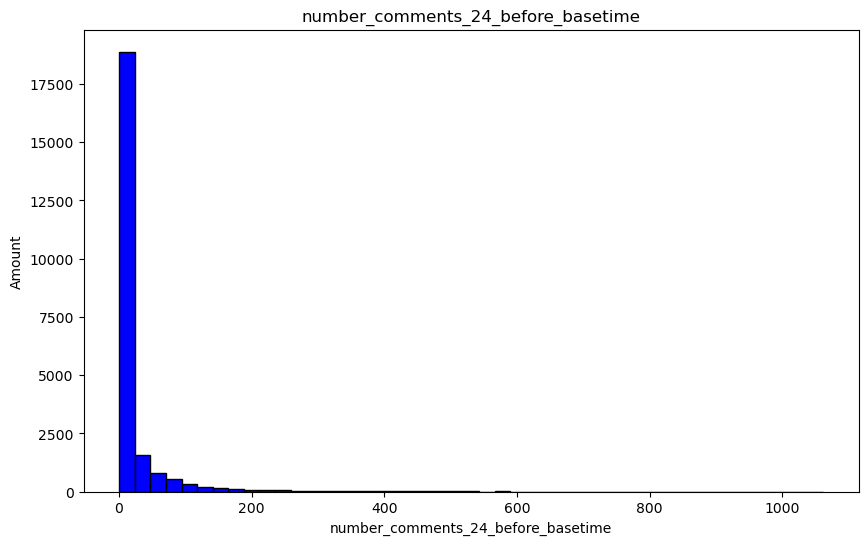

In [24]:
plt.figure(figsize=(10,6))
plt.hist(df_train_final['number_comments_24_before_basetime'], color='blue', edgecolor='black', bins=int(45/1))
 
plt.xlabel('number_comments_24_before_basetime')
plt.ylabel('Amount')
plt.title('number_comments_24_before_basetime')

In [31]:
df_corr = df_train.corr(method='pearson')


In [35]:
df_corr['number_of_comments'].sort_values(ascending=False).head(11)

number_of_comments                    1.000000
9                                     0.506540
20                                    0.503375
5                                     0.497631
4                                     0.491707
10                                    0.490111
14                                    0.489674
19                                    0.486316
0                                     0.485464
number_comments_24_before_basetime    0.472061
15                                    0.471999
Name: number_of_comments, dtype: float64